<h1><center><strong>CX 4803<br><br>Homework 4</strong></center></h1>
<h3><center><i>Dylan Both</i></center></h3>

In [ ]:
# imports
import csv
import numpy as np
import pandas as pd
from scipy import linalg
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
import math

## Problem 1:

### 1(a):

By Baye's Rule, we know that 
\begin{align}
p(\mu|x)&=\frac{p(x|\mu)p(\mu)}{p(x)}.
\end{align}
Then $p(\mu|x)$ is proportional to $p(x|\mu)p(\mu)$. Further, $p(\mu|x)$, our posterior distribution, is multivariate normal $N(\mu|\mu_{n}, \Sigma_{n})$ for some $\mu_{n}$ and $\Sigma_{n}$ since it is the product of multivariate normals. Since we are given $\mu_{n}$ and $\Sigma_{n}$, we can easily find our posterior distribution. Since $p(x|\mu)p(\mu)$ is proportional to our posterior distribution, 
\begin{align}
p(x|\mu)p(\mu)&\propto N(\mu|\mu_{n}, \Sigma_{n})\\
&\propto \frac{1}{(2\pi)^{\frac{1}{2}}}\cdot \frac{1}{\mid\Sigma\mid ^{\frac{1}{2}}}\exp\left(-\frac{1}{2}(\mu-\mu_{n})^T\Sigma_{n}^{-1}(\mu-\mu_{n})\right).
\end{align}
Then 
\begin{align}
p(x|\mu)p(\mu)&= c\cdot\exp\left(-\frac{1}{2}(\mu-\mu_{n})^T\Sigma_{n}^{-1}(\mu-\mu_{n})\right).
\end{align}
for some normalization constant c where $\mu_{n}$ and $\Sigma_{n}$ are given in the problem statement.


### 1(b):
Using numpy's multivariate normal object, we generate five random observations from $N(-1, \Sigma)$.

In [ ]:
# generate x1,...x5
mu = -1*np.ones(3)  # Mean vector
Sigma = np.array([[1, 0, -0.2], [0, 0.8, 0.3], [-0.2, 0.3, 1.1]])  # Covariance matrix
X = np.random.multivariate_normal(mu, Sigma, 5)

The posterior mean is simply $\mu_{n}$. We have that
\begin{align}
\mu_{n}&=\Sigma_{0}(\Sigma_{0}+\frac{1}{n})^{-1}\bar{x}+\frac{1}{n}\Sigma(\Sigma_{0}+\frac{1}{n}\Sigma)^{-1}\mu_{0}.
\end{align}
We are given that $\Sigma_{0}=I$ and $\mu_{0}=\overrightarrow{0}$ and $n=5$. Then,
\begin{align}
\mu_{n}&=I(I+\frac{1}{5}\Sigma)^{-1}\bar{x}+\frac{1}{5}\Sigma(I+\frac{1}{5}\Sigma)^{-1}\overrightarrow{0}\\
&=(I+\frac{1}{5}\Sigma)^{-1}\bar{x}.
\end{align}


In [ ]:
# calculate x bar
x_bar = np.mean(X, axis=0)
# calculate mu_n
mu_n = np.linalg.inv(np.eye(3)+(1 / 5) * Sigma).dot(x_bar)

The posterior covariance matrix is 
\begin{align}
\Sigma_{n}&=\Sigma_{0}(\Sigma_{0}+\frac{1}{n})^{-1}\frac{1}{n}\Sigma\\
&=I(I+\frac{1}{5}\Sigma)^{-1}\frac{1}{5}\Sigma\\
&=(I+\frac{1}{5}\Sigma)^{-1}\frac{1}{5}\Sigma
\end{align}

In [ ]:
Sigma_n = np.linalg.inv(np.eye(3)+ (1/5) * Sigma).dot((1/5) * Sigma)

The posterior mean is
$$\mu_{n}= (-0.3889, -1.0541, -0.8998),$$
and the posterior covariance matrix is 
$$\Sigma_{n}=\begin{bmatrix}
0.1658 & 0.0014 & -0.0274\\
0.0014 & 0.1357 & 0.0426\\
-0.0274 & 0.0426 & 0.1773
\end{bmatrix}.$$

### 1(c):
Using $x_1$ as our first prior, we compute the posterior mean ($\mu_{n}$) and covariance matrix ($\Sigma_{n}$) for each $x_i$ in X using the formulas
\begin{align}
\mu_{n}&=\Sigma_{0}(\Sigma_{0}+\Sigma)^{-1}x_{i}+\Sigma(\Sigma_{0}+\Sigma)^{-1}\mu_{0}\text{ and}\\
\Sigma_{n}&=\Sigma_{0}(\Sigma_{0}+\Sigma)^{-1}\Sigma.
\end{align}

In [ ]:
# initiate priors
mu0 = np.zeros(3)
Sigma0 = np.eye(3)
# loop through each observation
for x in X:
    # update priors to be the mean and covariance matrix for the posterior distribution
    inv = np.linalg.inv(Sigma0 + Sigma)
    mu0 = (Sigma0.dot(inv)).dot(x) + (Sigma.dot(inv)).dot(mu0)
    Sigma0 = (Sigma0.dot(inv)).dot(Sigma)

The mean of the final posterior is 
$$\mu_{n} = (-0.3889, -1.0542, -0.8998),$$
and the final posterior covariance matrix is 
$$\Sigma_{n} = \begin{bmatrix}
0.1658 & 0.0014 & -0.0274\\
0.0014 & 0.1357 & 0.0426\\
-0.0274 & 0.0425 & 0.1773
\end{bmatrix}.$$

### 1(d):
The results from parts b and c are the same. Since our prior is normally distributed, our posterior will be normally distributed with every iteration. Then each iteration creates a normal posterior distribution that updates the mean and covariance matrix according to the data from that iteration's observation. Since the the posterior remains normal and the mean and covariance matrix can be updated based on a closed form recursive formula, the relationship between the mean and covariance matrix from one iteration to the next is the same for each iteration. Then updating the posterior for each observation captures this relationship for each observation. Updating all at once updates the mean and covariance matrix according to this relationship for all the observations. Therefore, updating all at once is equivalent to updating iteratively when the prior and posterior distributions are both normal.

## Problem 2:

### 2(a):
We begin by fitting an ordinary linear regression as well as a ridge regression with $\lambda =1$ to our data.

In [52]:
# read in the data
# read in data
x1 = np.loadtxt('hw4_q2.csv', delimiter=',', usecols=(0), unpack=True, dtype=float)
x2 = np.loadtxt('hw4_q2.csv', delimiter=',', usecols=(1), unpack=True, dtype=float)
x3 = np.loadtxt('hw4_q2.csv', delimiter=',', usecols=(2), unpack=True, dtype=float)
y = np.loadtxt('hw4_q2.csv', delimiter=',', usecols=(3), unpack=True, dtype=float)
# add the column of ones to the x observations and add the higher order terms
X = np.c_[np.ones(len(x1)), x1, x2, x3]

# solve the system
w_lin = linalg.lstsq(X, y)[0]

Using ordinary linear regression, the weights we obtain are
<ul>
    <li>$W_{0}=-0.0158$</li>
    <li>$w_{1}=0.9642$</li>
    <li>$w_{2}=1.0321$</li>
    <li>$w_{3}=1.0265$</li>
</ul>

In [ ]:
# fit ridge regression
X_ridge = np.vstack([X, math.sqrt(1)*np.eye(4)])
y_ridge = np.concatenate([y, np.zeros((4))])
w_ridge = linalg.lstsq(X_ridge, y_ridge)[0]

Using ridge regression with parameter $\lambda=1$ yields the following weights:
<ul>
    <li>$W_{0}=0.2388$</li>
    <li>$w_{1}=0.7880$</li>
    <li>$w_{2}=0.8494$</li>
    <li>$w_{3}=0.8401$</li>
</ul>

### 2(b):
In class, we showed that our posterior distribution is normal $p(w|y)\sim N(w\mid m_{n}, S_{n})$ where 
\begin{align}
m_{n}&=S_{n}[S_{0}^{-1}+\sigma^2\Phi y]\\
S_{n} &= [S_{0}^{-1}+\frac{1}{\sigma^2} \Phi^{T}\Phi]^{-1}\\
\text{and}\\
p(w)&\sim N(w\mid m_{0}, S_{0}).
\end{align}
Our MAP weights are the weights that maximize our posterior. Since our posterior is normal, it is maximized at its mean, $m_{n}$. Thus, our MAP weights are $m_{n}$ given above. In our problem, we have that $m_{0}=0$ and $S_{0} = \frac{1}{\alpha}$. Plugging these values into our formulas for $m_{n}$ and $S_{n}$ yield
\begin{align}
m_{n}&=\frac{1}{\sigma^2} S_{n}\Phi^{T}\bar{y}\\
S_{n}&=[\alpha I +\frac{1}{\sigma^2} \Phi^{T}\Phi]^{-1}\\
\text{plugging $S_{n}$ into the formula for $m_{n}$:}\\
m_{n}&=\frac{1}{\sigma^2}(\alpha I+\frac{1}{\sigma^2} \Phi^{T}\Phi)^{-1}\Phi^{T}\bar{y}\\
\text{where $\bar{y}$ is the column vector containing all y observations.}\\
&=\left(\frac{1}{\frac{1}{\sigma^2}}\right)^{-1}(\alpha I+\frac{1}{\sigma^2}\Phi^{T}\Phi)^{-1}\Phi^{T}\bar{y}\\
&=\left(\alpha\sigma^2I+\Phi^{T}\Phi\right)^{-1}\Phi^{T}\bar{y}.
\end{align}
This is equivalent to ridge regression with parameter $\lambda = \alpha\sigma^2$. Therefore, to implement our Bayesian regression or various values of $\alpha$, we simply implement ridge regressions with parameter $\lambda=\alpha\sigma^2$. GIven $\sigma^2=0.1$, we have that $\lambda=0.1\alpha$. We choose the values $0.001, 0.01,0.1, 1, 10, 100, $ and $1000$ for $\alpha$ and implement our Bayesian Regression. I also calculate the weights using the formula for $m_n$ given above for part (f) to demonstrate the equivalence.

In [43]:
# pick alpha values
alpha_list = [0.001 * 10**i for i in range(7)]
# initiate a list to store weights for each alpha using ridge
w_list = []
# initiate a list to store weights using m_n formula
mn_list = []

# loop through each alpha value
for alpha in alpha_list:
    # implement equivalent ridge regression
    X_train = np.vstack([X, np.sqrt(0.1*alpha) * np.eye(4)])
    y_train = np.concatenate([y, np.zeros(4)])
    w = np.array(linalg.lstsq(X_train, y_train)[0])
    w_list.append(w) 
    
    mn = (np.linalg.inv(alpha*0.1*np.eye(4)+(X.T).dot(X)).dot(X.T)).dot(y)
    mn_list.append(mn)

When $\alpha = 0.1$, our MAP weights are:
<ul>
    <li>$w_{0}=-0.0122$</li>
    <li>$w_{1}=0.9616$</li>
    <li>$w_{2}=1.0295$</li>
    <li>$w_{3}=1.0239$</li>
</ul>
When $\alpha = 10$, our MAP weights are:
<ul>
    <li>$w_{0}=0.2388$</li>
    <li>$w_{1}=0.7880$</li>
    <li>$w_{2}=0.8494$</li>
    <li>$w_{3}=0.8401$</li>
</ul>

### 2(c):
We now fix $x_2$ and $x_{3}$ at $0.5$ and plot our predictions using the MAP weights as a function of $x_1$ for various values of $\alpha$. Each line represents the predictions obtained from the MAP weights associated with the specified value of $\alpha$, and the blue dots represent the original $(x_{1}, y)$ observations.

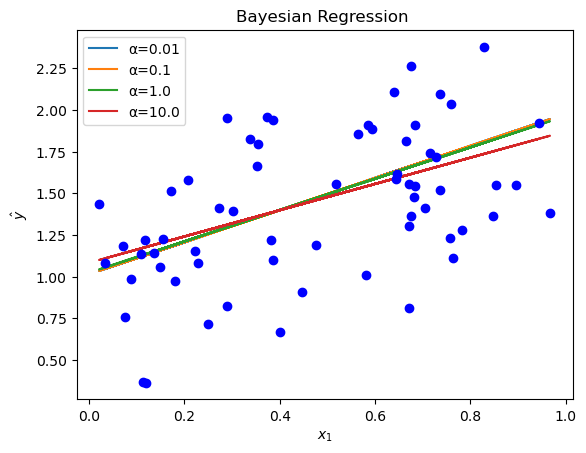

In [46]:
# define X matrix
X_plot = np.c_[np.ones(len(y)), x1, 0.5*np.ones(len(y)), 0.5*np.ones(len(y))]
# loop through each set of weights
i = 1
for w in w_list[1:-2]:
    y_hat = w.dot(X_plot.T)
    plt.plot(x1, y_hat, label=f'\u03B1={alpha_list[i]}')
    i += 1
plt.plot(x1, y, 'bo')
plt.xlabel('$x_{1}$')
plt.ylabel('$\hat{y}$')
plt.title('Bayesian Regression ')
plt.legend()
plt.show()

### 2(d):
As mentioned above, our posterior is normal $p(w|y)\sim N(w\mid m_{n}, S_{n})$ where 
\begin{align}
m_{n}&=\left(\alpha\sigma^2I+\Phi^{T}\Phi\right)^{-1}\Phi^{T}\bar{y}\\
\text{ and}\\
S_{n} &= [\alpha I +\frac{1}{\sigma^2} \Phi^{T}\Phi]^{-1}\\
\end{align}
Using this information, we set $\alpha=0.1$ and draw 20 samples from this posterior distribution. We already calculated our $m_{n}$ value when we implemented our Bayesian Linear Regression for $\alpha = 0.1$, so we only need to calculate the variance of this distribution.

In [7]:
alpha = 0.1
# get the mean of the distribution
mn = w_list[2]
# calculate the variance of the distribution
Sn = np.linalg.inv(alpha * np.eye(4) + (1 / 0.1) * (X.T).dot(X))
# get 20 observations from the distribution
obs = np.random.multivariate_normal(mn, Sn, 20)

For each of these observations, we make predictions setting $x_2=x_3=0.5$ and plot these predictions as a function of $x_1$. Each line represents the predictions given by one of the 20 observations. The blue dots once again represent the training data.

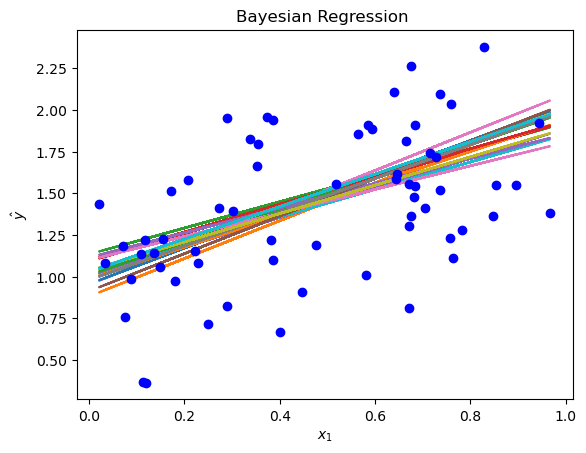

In [8]:
# loop through each set of observation
for ob in obs:
    # get model predictions
    y_hat = ob.dot(X_plot.T)
    plt.plot(x1, y_hat)
plt.plot(x1, y, 'bo')
plt.xlabel('$x_{1}$')
plt.ylabel('$\hat{y}$')
plt.title('Bayesian Regression ')
plt.show()

### 2(e):
As $\alpha \rightarrow 0$, our MAP weights get larger.  Intuitively, this is clear since our Bayesian Regression is equivalent to Ridge Regression with penalty parameter $\lambda = 0.1\alpha$. This penalty gets smaller as $\alpha \rightarrow 0$, so the weights in our regression are not as strongly restricted. We can confirm this result by plotting the weights as a function of alpha. The figure below plots each $w_{i}$ as a seperate series.

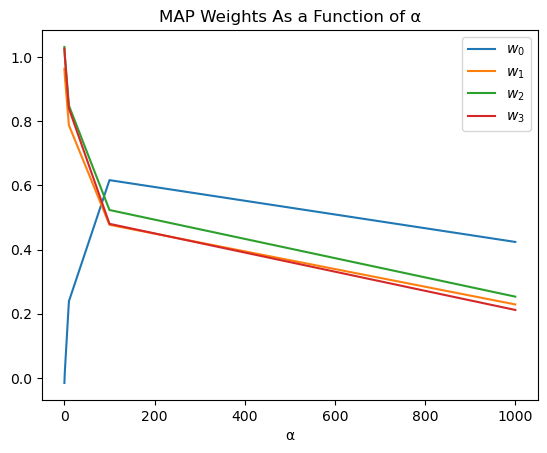

In [35]:
# plot the MAP weights as a function of alpha
for i in range(4):
    plt.plot(alpha_list, [w[i] for w in w_list], label = f'$w_{i}$')

plt.legend()
plt.title('MAP Weights As a Function of \u03B1')
plt.xlabel('\u03B1')

plt.show()

This visual demonstrates that the weights on each $x_1, x_2$, and $x_3$ get larger as $\alpha$ decreases and approaches $0$. The intercept gets larger as $\alpha$ decreases for large values of $\alpha$, but decreases as $\alpha$ gets close to $0$.

### 2(f):
Given the prior in this problem (Normal with mean 0), Bayesian linear regression and Ridge regression with penalty parameter $\lambda = \sigma^2\cdot\alpha=0.1\alpha$ are equivalent. To demonstrate this, in part (b) I used both ridge regression with penalty $\lambda =0.1\alpha$ as well as our Bayesian posterior distribution mean. The resulitng lists of weights (one set of weights for each value of $\alpha$) are identical as seen below. 

In [44]:
w_list

[array([-0.01580458,  0.9641393 ,  1.03207964,  1.02648369]),
 array([-0.01547309,  0.96391169,  1.03184413,  1.02624792]),
 array([-0.01217271,  0.96164542,  1.02949912,  1.02389972]),
 array([0.01944258, 0.9399216 , 1.00701414, 1.00133463]),
 array([0.23876209, 0.78796102, 0.84935469, 0.84007103]),
 array([0.61662228, 0.47732887, 0.52347658, 0.48037661]),
 array([0.42386599, 0.22899174, 0.25329402, 0.21176472])]

In [45]:
mn_list

[array([-0.01580458,  0.9641393 ,  1.03207964,  1.02648369]),
 array([-0.01547309,  0.96391169,  1.03184413,  1.02624792]),
 array([-0.01217271,  0.96164542,  1.02949912,  1.02389972]),
 array([0.01944258, 0.9399216 , 1.00701414, 1.00133463]),
 array([0.23876209, 0.78796102, 0.84935469, 0.84007103]),
 array([0.61662228, 0.47732887, 0.52347658, 0.48037661]),
 array([0.42386599, 0.22899174, 0.25329402, 0.21176472])]

The plot below shows the predicted values for the weights obtained by Bayesian regression for the specified values of $\alpha$ as well as non-regularized linear regression when we set $x_1=x_2=0.5$.

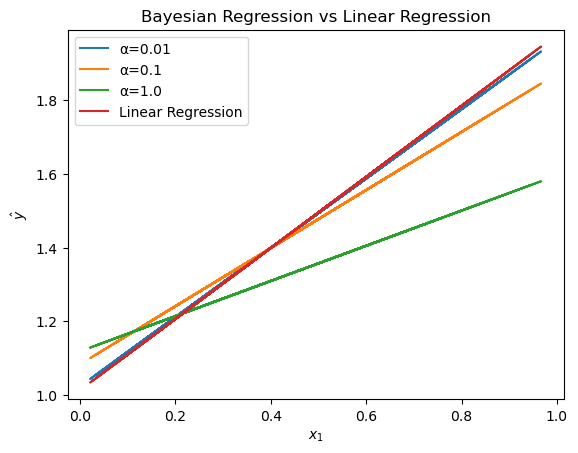

In [58]:
new_w = [w_list[6], w_lin]
# define X matrix
X_plot = np.c_[np.ones(len(y)), x1, 0.5*np.ones(len(y)), 0.5*np.ones(len(y))]
# loop through each set of weights
i = 1
for w in w_list[3:-1]:
    y_hat = w.dot(X_plot.T)
    plt.plot(x1, y_hat, label=f'\u03B1={alpha_list[i]}')
    i += 1
y_hat = w_lin.dot(X_plot.T)
plt.plot(x1, y_hat, label=f'Linear Regression')    
plt.xlabel('$x_{1}$')
plt.ylabel('$\hat{y}$')
plt.title('Bayesian Regression vs Linear Regression')
plt.legend()
plt.show()

We can see that, when $\alpha$ is small, our Bayesian regression is very similar to non-regularized linear regression. However, as we increase $\alpha$, our Bayesian linear regression diverges from linear regression. As $\alpha$ increases, the intercept increases, but the weights shrink to be much smaller than those obtained in ordinary linear regression. This result is intuitive based on the equivalent ridge regression. The larger the penalty term in ridge regession, the more the weights are shrunk.